In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_samples = 500

# First 10 general features
general_features = [
    'Energy_Level', 'Mood', 'Appetite', 'Sleep_Quality', 'Digestion',
    'Stress_Level', 'Concentration', 'Physical_Activity', 'Hydration', 'Mood_Swings'
]

# 5 Virechana-specific features
virechana_features = [
    'Body_Heat', 'Acidity', 'Bowel_Movement', 'Thirst_Level', 'Skin_Inflammation'
]

all_features = general_features + virechana_features

# Categories for all features (ensure all are lists of strings)
categories = {
    'Energy_Level': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Mood': ['Very Sad', 'Sad', 'Neutral', 'Happy', 'Very Happy'],
    'Appetite': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Sleep_Quality': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Digestion': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Stress_Level': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Concentration': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Physical_Activity': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Hydration': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Mood_Swings': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Body_Heat': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Acidity': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Bowel_Movement': ['Very Rare', 'Rare', 'Normal', 'Frequent', 'Very Frequent'],
    'Thirst_Level': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Skin_Inflammation': ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe']
}

# Numeric mapping for target calculation
score_map = {
    'Very Low': 1, 'Low': 2, 'Moderate': 3, 'High': 4, 'Very High': 5,
    'Very Sad': 1, 'Sad': 2, 'Neutral': 3, 'Happy': 4, 'Very Happy': 5,
    'Very Poor': 1, 'Poor': 2, 'Average': 3, 'Good': 4, 'Excellent': 5,
    'Very Rare': 1, 'Rare': 2, 'Normal': 3, 'Frequent': 4, 'Very Frequent': 5,
    'None': 1, 'Mild': 2, 'Moderate': 3, 'Severe': 4, 'Very Severe': 5
}

# Generate synthetic dataset safely
data = {}
for feature in all_features:
    cats = categories[feature]
    # Ensure np.random.choice always gets a proper list
    cats = [str(c).strip() for c in cats]
    data[feature] = np.random.choice(cats, size=n_samples)

df = pd.DataFrame(data)

# Double-check for NaNs and fill if any
for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Calculate Pitta level
def calculate_pitta(row):
    factors = [
        score_map[row['Body_Heat']],
        score_map[row['Acidity']],
        score_map[row['Bowel_Movement']],
        score_map[row['Thirst_Level']],
        score_map[row['Skin_Inflammation']]
    ]
    return round((sum(factors) / (len(factors) * 5)) * 100, 1)

# Calculate overall improvement
def calculate_improvement(row):
    factors = [
        score_map[row['Energy_Level']],
        score_map[row['Appetite']],
        score_map[row['Digestion']],
        score_map[row['Sleep_Quality']],
        score_map[row['Hydration']],
        score_map[row['Concentration']]
    ]
    return round((sum(factors) / (len(factors) * 5)) * 100, 1)

df['Pitta_Level'] = df.apply(calculate_pitta, axis=1)
df['Overall_Improvement'] = df.apply(calculate_improvement, axis=1)

# Save to Excel
df.to_excel('Virechana_Feedback_Synthetic.xlsx', index=False)

print(df.head(10))
print("\nCheck for NaNs:")
print(df.isna().sum())


  Energy_Level        Mood   Appetite Sleep_Quality  Digestion Stress_Level  \
0         High       Happy       High          Good       Good    Very High   
1    Very High    Very Sad       High          Poor    Average    Very High   
2     Moderate  Very Happy       High          Good       Poor         High   
3    Very High     Neutral       High       Average  Very Poor     Very Low   
4    Very High     Neutral  Very High     Very Poor  Excellent    Very High   
5          Low    Very Sad  Very High          Good  Excellent          Low   
6     Moderate       Happy        Low     Very Poor  Very Poor    Very High   
7     Moderate       Happy   Very Low          Poor  Very Poor         High   
8     Moderate  Very Happy       High     Very Poor       Poor          Low   
9    Very High    Very Sad        Low          Poor    Average         High   

  Concentration Physical_Activity  Hydration Mood_Swings  Body_Heat  \
0       Average          Very Low   Moderate         Low   

In [2]:
import pandas as pandas 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
import pickle

In [3]:
df=pd.read_excel('Virechana_Feedback_Synthetic.xlsx')

In [4]:
df

,Energy_Level,Mood,Appetite,Sleep_Quality,Digestion,Stress_Level,Concentration,Physical_Activity,Hydration,Mood_Swings,Body_Heat,Acidity,Bowel_Movement,Thirst_Level,Skin_Inflammation,Pitta_Level,Overall_Improvement
0,High,Happy,High,Good,Good,Very High,Average,Very Low,Moderate,Low,Low,Moderate,Very Rare,Very High,Very Severe,64,73.3
1,Very High,Very Sad,High,Poor,Average,Very High,Excellent,Moderate,Very High,Very High,Very High,Very Low,Frequent,Very Low,Mild,52,80.0
2,Moderate,Very Happy,High,Good,Poor,High,Very Poor,Very Low,Low,Very Low,High,High,Rare,Very Low,Very Severe,64,53.3
3,Very High,Neutral,High,Average,Very Poor,Very Low,Excellent,Low,Very High,Very Low,High,Very High,Normal,Very High,NaN,72,76.7
4,Very High,Neutral,Very High,Very Poor,Excellent,Very High,Poor,Moderate,Low,High,Very High,Very High,Rare,Moderate,Mild,68,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Very Low,Sad,High,Very Poor,Poor,High,Very Poor,High,Very Low,High,Moderate,Low,Very Frequent,Moderate,Severe,68,33.3
496,Moderate,Very Sad,Very High,Excellent,Average,Very High,Poor,Very Low,Low,High,Very High,Very Low,Rare,Moderate,Very Severe,64,66.7
497,Very Low,Very Sad,Very High,Very Poor,Poor,Moderate,Excellent,Very High,Moderate,Very High,Moderate,Very Low,Normal,Low,NaN,40,56.7
498,Very Low,Happy,High,Excellent,Average,Low,Good,Very Low,High,High,Very High,Moderate,Rare,Low,Moderate,60,70.0


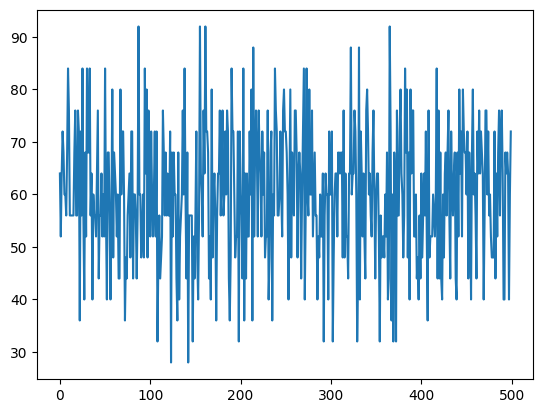

In [5]:
 plt.plot(df['Pitta_Level'])

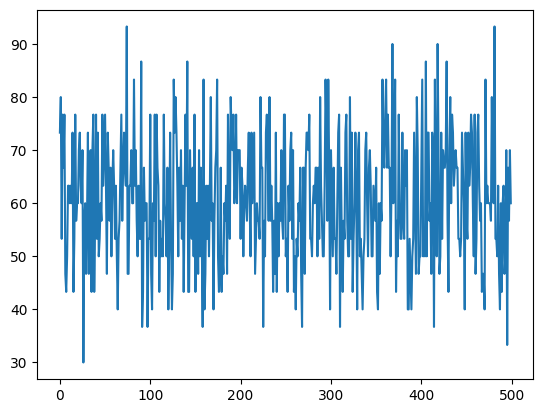

In [6]:
plt.plot(df['Overall_Improvement'])

In [7]:
df.dropna(inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 0 to 499
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Energy_Level         402 non-null    object 
 1   Mood                 402 non-null    object 
 2   Appetite             402 non-null    object 
 3   Sleep_Quality        402 non-null    object 
 4   Digestion            402 non-null    object 
 5   Stress_Level         402 non-null    object 
 6   Concentration        402 non-null    object 
 7   Physical_Activity    402 non-null    object 
 8   Hydration            402 non-null    object 
 9   Mood_Swings          402 non-null    object 
 10  Body_Heat            402 non-null    object 
 11  Acidity              402 non-null    object 
 12  Bowel_Movement       402 non-null    object 
 13  Thirst_Level         402 non-null    object 
 14  Skin_Inflammation    402 non-null    object 
 15  Pitta_Level          402 non-null    int64  


In [9]:
# Get features and target columns from Virechana dataset
features = [col for col in df.columns if df[col].dtype == 'object']
target = [col for col in df.columns if df[col].dtype == 'float64' or df[col].dtype == 'int64' ]

# Define the ordered categories for each feature
order_map = {
    # General features (same as before)
    "Energy_Level": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Mood": ['Very Sad', 'Sad', 'Neutral', 'Happy', 'Very Happy'],
    "Appetite": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Sleep_Quality": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Digestion": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Stress_Level": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Concentration": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Physical_Activity": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Hydration": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Mood_Swings": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],

    # Virechana-specific features
    "Body_Heat": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Acidity": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Bowel_Movement": ['Very Rare', 'Rare', 'Normal', 'Frequent', 'Very Frequent'],
    "Thirst_Level": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Skin_Inflammation": ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe']
}

# Create the list of ordered categories
categories_list = [order_map[col] for col in features]


In [10]:
preprocessor=ColumnTransformer([('OrdinalEncoder',OrdinalEncoder(categories=categories_list),features)
])

In [11]:
X_train,X_test,y_train,y_test=train_test_split(df[features],df[target],test_size=0.2)

In [12]:
model=MultiOutputRegressor( XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
))


In [13]:
final_pipeline=Pipeline([('preprocessor',preprocessor),
                        ('XGB_model',model)])

In [14]:
final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OrdinalEncoder',
                                                  OrdinalEncoder(categories=[['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Moderate',
                                                                              'High',
                                                                              'Very '
                                                                              'High'],
                                                                             ['Very '
                                                                              'Sad',
                                                                              'Sad',
                                                                              'Neutral',
                                                                              'Happy',
                                                                              'Very '
                                                                              'Happy'],
                                                                             ['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Moderate',
                                                                              'High',
                                                                              'Very '
                                                                              'High'],
                                                                             ['Very '
                                                                              'Poor',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Excellent'],
                                                                             ['Very '
                                                                              'Poor',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good...
                                                             feature_weights=None,
                                                             gamma=None,
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.05,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=4,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=na

In [15]:
y_pred=final_pipeline.predict(X_test)

In [20]:
r2_score(y_pred[:,0],y_test.iloc[:,0])

0.9705681204795837

In [ ]:
with open('Virechana_model.pkl','wb') as f:
    pickle.dump()